In [22]:
from tqdm import tqdm
import numpy as np
import torch
import matplotlib.pyplot as plt

import vae
import data

In [54]:
# Creates shape random shape data.
shape_data = data.Generator(100000).generate_shapes()

# Creates PyTorch dataset.
dataset = vae.ShapeData(shape_data)

# Build VAE Model.
model = vae.VAE(2)

# Initialises model trainer.
trainer = vae.Trainer(dataset,model,lr=1e-3,batch_size=512,loss='mse')
trainer.train_model(100)

100%|██████████| 100000/100000 [00:06<00:00, 15289.01it/s]


Epoch 1, Loss: 21.59692506492138
Epoch 2, Loss: 13.93065043631941
Epoch 3, Loss: 14.063311910256743
Epoch 4, Loss: 14.1586808077991
Epoch 5, Loss: 13.216859995387495
Epoch 6, Loss: 13.667948207817972
Epoch 7, Loss: 13.438197802752256
Epoch 8, Loss: 13.465299488976598
Epoch 9, Loss: 9.908731820061803
Epoch 10, Loss: 8.770339354872704
Epoch 11, Loss: 8.28290958981961
Epoch 12, Loss: 8.508984308689833
Epoch 13, Loss: 9.188948715105653
Epoch 14, Loss: 8.807870139367878
Epoch 15, Loss: 9.774841599166393
Epoch 16, Loss: 8.569336095824838
Epoch 17, Loss: 9.088122371584177
Epoch 18, Loss: 8.98752522841096
Epoch 19, Loss: 7.932420225813985
Epoch 20, Loss: 8.991679083555937
Epoch 21, Loss: 8.49030928593129
Epoch 22, Loss: 8.681372489780188
Epoch 23, Loss: 7.787039621733129
Epoch 24, Loss: 8.9892215449363
Epoch 25, Loss: 8.937308318912983
Epoch 26, Loss: 8.514739461243153
Epoch 27, Loss: 8.13415375072509
Epoch 28, Loss: 8.149958954192698
Epoch 29, Loss: 8.181605112738907
Epoch 30, Loss: 9.0715184

In [69]:
test_shapes = data.Generator(5).generate_shapes()

100%|██████████| 5/5 [00:00<00:00, 2840.90it/s]


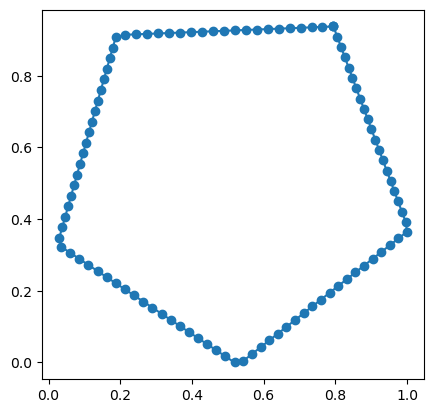

In [70]:
test_shapes[0].plot()

In [65]:
dt = [torch.tensor(shape.points, dtype=torch.float32).view(-1) for shape in test_shapes]

In [89]:
x = model.encoder(dt[0])  # Encoder block.
mu,logvar = model.fc_mu(x),model.fc_logvar(x)  # Mu & Logvar for latent layer.
z = model.reparameterise(mu,logvar)  # Obtain latent variables.
print(z)  # Z is differet each time due to the random sampling of epsilon.

tensor([-0.6029,  0.1349], grad_fn=<AddBackward0>)


In [86]:
z

tensor([-0.3686, -0.0317], grad_fn=<AddBackward0>)

In [66]:
model.eval()

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=200, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
  )
  (fc_mu): Linear(in_features=64, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=64, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=200, bias=True)
  )
)

(100, 2)


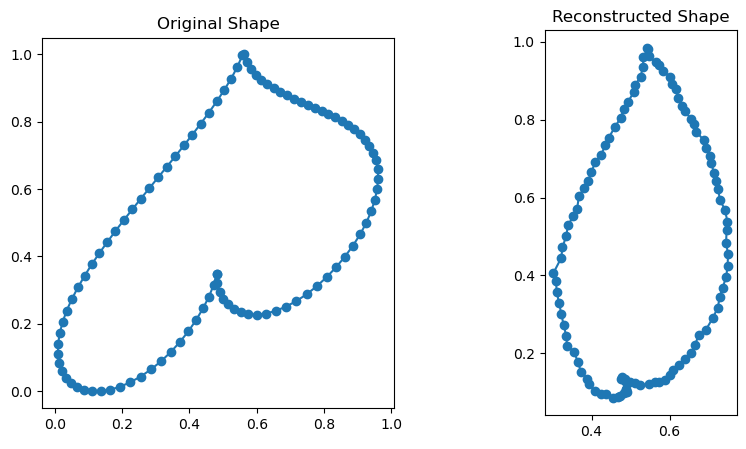

(100, 2)


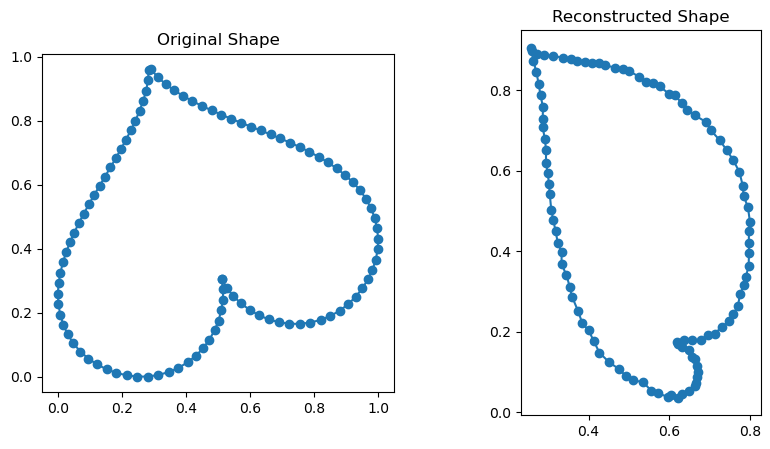

(100, 2)


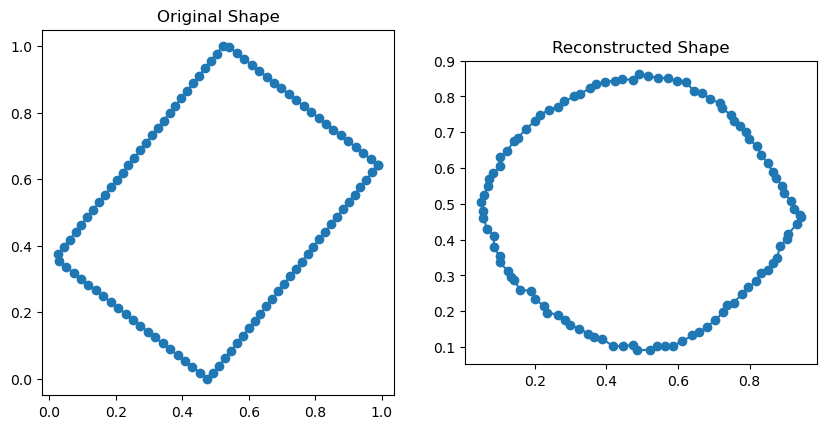

(100, 2)


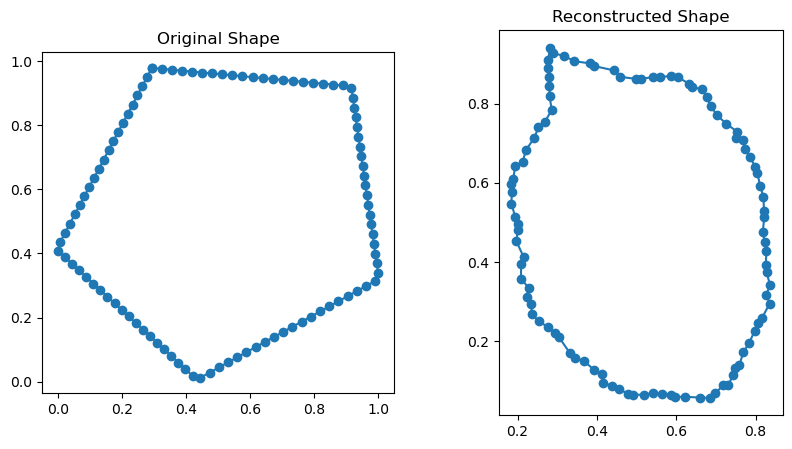

(100, 2)


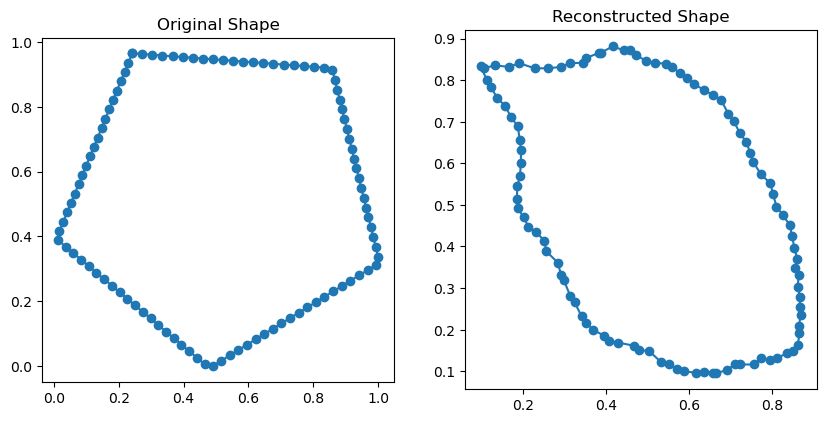

In [67]:
# Pass through VAE
with torch.no_grad():
    for shape in dt:
        recon_shape, mu, log_var = model(shape)
        recon_shape = recon_shape.squeeze(0).numpy().reshape(-1,2)

        orig_shape = shape.squeeze(0).numpy().reshape(-1,2)
        print(orig_shape.shape)
        # Plot Original vs. Reconstructed
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        axs[0].plot(orig_shape[:, 0], orig_shape[:, 1], 'o-', label="Original")
        axs[0].set_title("Original Shape")
        axs[0].set_aspect('equal')

        axs[1].plot(recon_shape[:, 0], recon_shape[:, 1], 'o-', label="Reconstructed")
        axs[1].set_title("Reconstructed Shape")
        axs[1].set_aspect('equal')

        plt.show()


In [28]:
# Convert back to NumPy for visualization
test_shape = dt[0].squeeze(0).numpy()
recon_shape = recon_shape.squeeze(0).numpy()

In [20]:
# Reshape back to 2D (assuming (x,y) pairs)
test_shape_2d = test_shape[:200].reshape(-1, 2)
recon_shape_2d = recon_shape[:200].reshape(-1, 2)

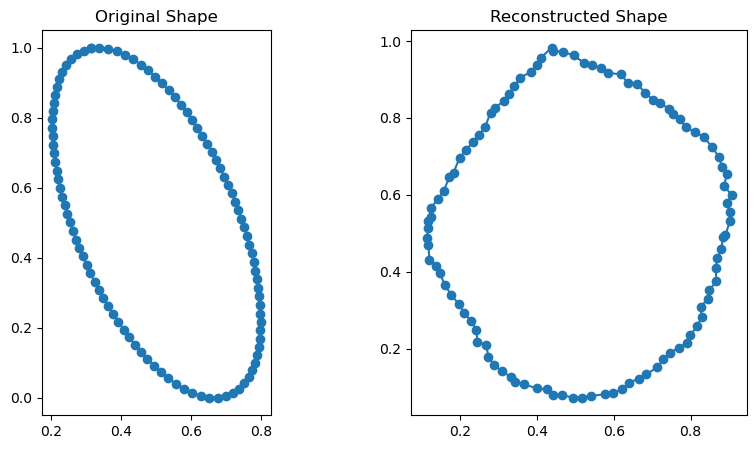

In [21]:
# Plot Original vs. Reconstructed
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(test_shape_2d[:, 0], test_shape_2d[:, 1], 'o-', label="Original")
axs[0].set_title("Original Shape")
axs[0].set_aspect('equal')

axs[1].plot(recon_shape_2d[:, 0], recon_shape_2d[:, 1], 'o-', label="Reconstructed")
axs[1].set_title("Reconstructed Shape")
axs[1].set_aspect('equal')

plt.show()